In [69]:
import random

def kArmedBandit(k=10, e=0.1, steps=10000, q_star = [0], stationary=True, fixed_alpha=False, alpha=0.1):
    if len(q_star) == 1 and k>1:
        q_star = q_star*k

    Q = {a:0 for a in range(k)}
    N = {a:0 for a in range(k)}

    rewards = []
    actions = []
    for i in range(steps):
        if not stationary:
            q_star = [q + random.gauss(0, 0.01) for q in q_star] 
        A = random.choice(range(k)) if random.random() < e else max(Q, key=lambda k: Q[k])
        R = random.gauss(q_star[A], 1)
        N[A] = N[A] + 1

        if not fixed_alpha:
            alpha = (1/N[A]) 

        Q[A] = Q[A] + alpha * (R-Q[A]) 

        rewards.append(R)
        actions.append(A)

    return actions, rewards, Q


In [70]:
_,_,q = kArmedBandit(10, 0.5, 1000, stationary=True, fixed_alpha=True)
q

{0: -0.010716358437549839,
 1: -0.3458523101424841,
 2: -0.18754532869499607,
 3: -0.4174734747805612,
 4: -0.2567969878390785,
 5: 0.021766220833953437,
 6: -0.25713279596657335,
 7: -0.2629932342637006,
 8: -0.21274495115676,
 9: -0.14345999833608652}

In [71]:
import pandas as pd

runs = 2000
df = None
df2 = None
for i in range(runs):
    actions, rewards, q = kArmedBandit(stationary=False)
    temp = pd.DataFrame({"steps": range(len(actions)), "actions": actions, "rewards": rewards})
    temp.insert(0, 'run', i) 
    if df is None:
        df = temp
    else: 
        df = pd.concat([df,temp])
    
    actions2, rewards2, q2 = kArmedBandit(stationary=False, fixed_alpha=True)
    temp = pd.DataFrame({"steps": range(len(actions2)), "actions": actions2, "rewards": rewards2})
    temp.insert(0, 'run', i) 
    if df2 is None:
        df2 = temp
    else: 
        df2 = pd.concat([df2,temp])

df2.head()

,run,steps,actions,rewards
0,0,0,0,0.923684
1,0,1,0,0.173818
2,0,2,0,-0.147525
3,0,3,0,-0.541708
4,0,4,0,0.076068


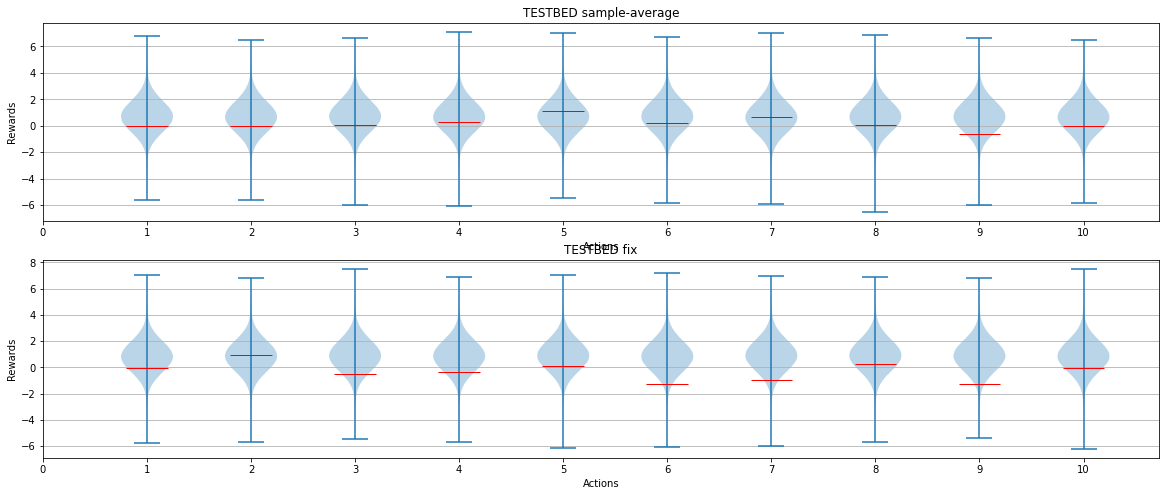

In [72]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(20, 8))

axes[0].violinplot(dataset = [df[df.actions == 0]["rewards"].values,
                           df[df.actions == 1]["rewards"].values,
                           df[df.actions == 2]["rewards"].values,
                           df[df.actions == 3]["rewards"].values,
                           df[df.actions == 4]["rewards"].values,
                           df[df.actions == 5]["rewards"].values,
                           df[df.actions == 6]["rewards"].values,
                           df[df.actions == 7]["rewards"].values,
                           df[df.actions == 8]["rewards"].values,
                           df[df.actions == 9]["rewards"].values])

axes[1].violinplot(dataset = [df2[df2.actions == 0]["rewards"].values,
                           df2[df2.actions == 1]["rewards"].values,
                           df2[df2.actions == 2]["rewards"].values,
                           df2[df2.actions == 3]["rewards"].values,
                           df2[df2.actions == 4]["rewards"].values,
                           df2[df2.actions == 5]["rewards"].values,
                           df2[df2.actions == 6]["rewards"].values,
                           df2[df2.actions == 7]["rewards"].values,
                           df2[df2.actions == 8]["rewards"].values,
                           df2[df2.actions == 9]["rewards"].values])

for k, v in q.items():
    axes[0].hlines(y=v, xmin=k+1-0.2, xmax=k+1+0.2, linewidth=1, color='r')

for k, v in q2.items():
    axes[1].hlines(y=v, xmin=k+1-0.2, xmax=k+1+0.2, linewidth=1, color='r')

axes[0].set_title('TESTBED sample-average')
axes[0].yaxis.grid(True)
axes[0].set_xlabel('Actions')
axes[0].set_ylabel('Rewards')
axes[0].set_xticks(ticks=range(11))
axes[1].set_title('TESTBED fix')
axes[1].yaxis.grid(True)
axes[1].set_xlabel('Actions')
axes[1].set_ylabel('Rewards')
axes[1].set_xticks(ticks=range(11))

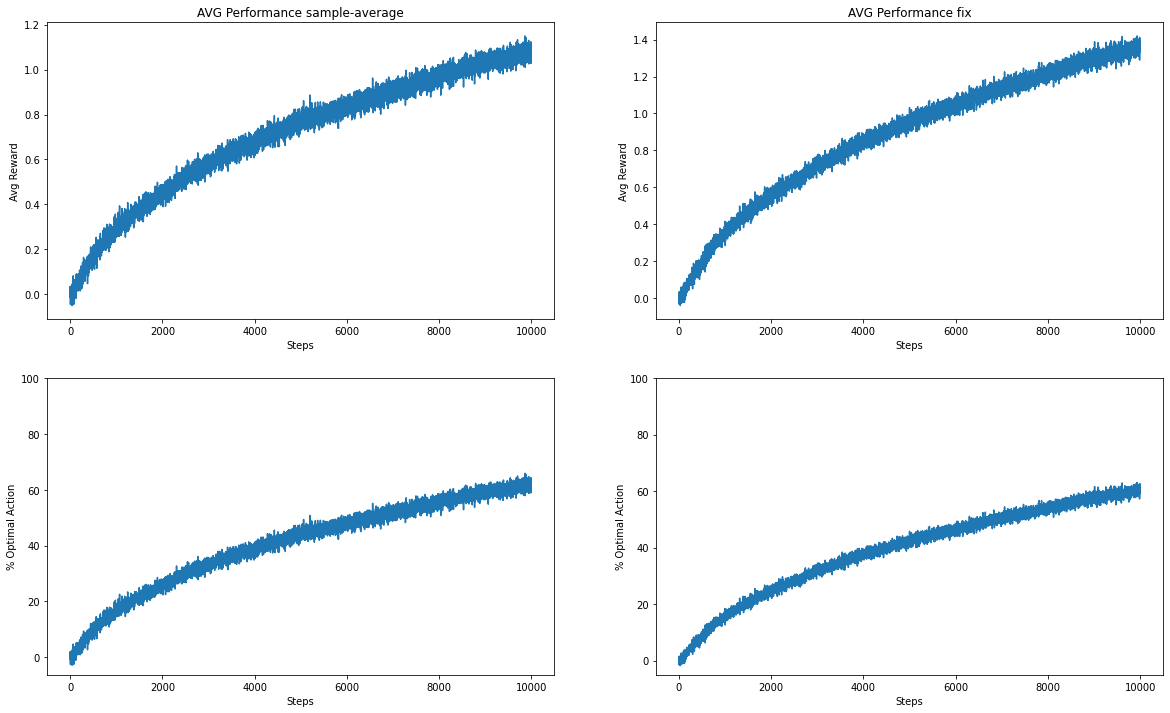

In [73]:
fig, axes = plt.subplots(2,2, figsize=(20, 12))

axes[0][0].plot(df[["steps", "rewards"]].groupby(['steps']).mean())
axes[0][1].plot(df2[["steps", "rewards"]].groupby(['steps']).mean())

actions_range = (q[max(q, key=lambda k: q[k])] - q[min(q, key=lambda k: q[k])])
actions_range2 = (q2[max(q2, key=lambda k: q2[k])] - q2[min(q2, key=lambda k: q2[k])])
axes[1][0].plot(df[["steps", "rewards"]].groupby(['steps']).mean()/actions_range*100)
axes[1][1].plot(df2[["steps", "rewards"]].groupby(['steps']).mean()/actions_range2*100)

axes[0][0].set_title('AVG Performance sample-average')
axes[0][0].set_xlabel('Steps')
axes[0][0].set_ylabel('Avg Reward')
axes[1][0].set_xlabel('Steps')
axes[1][0].set_ylabel('% Optimal Action')
axes[1][0].set_yticks(ticks=range(0, 101, 20))

axes[0][1].set_title('AVG Performance fix')
axes[0][1].set_xlabel('Steps')
axes[0][1].set_ylabel('Avg Reward')
axes[1][1].set_xlabel('Steps')
axes[1][1].set_ylabel('% Optimal Action')
axes[1][1].set_yticks(ticks=range(0, 101, 20))